# 자치구별 생활인구 / 연령층 대비 percentage 

**목표 : 최대한 결과를 도출해보고 시사점과 한계점 도출**

# 데이터 / 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

rc('font',family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('자치구 단위 서울 생활인구(내국인).csv',encoding='cp949')
df

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20240125,0,11110,200569.1599,4767.4016,2870.9951,4787.1924,7805.0412,7963.7170,7011.4199,...,8989.3106,7013.2395,8042.6319,7423.0539,8743.5224,8000.7054,8047.2581,6767.8748,4852.6901,13745.5646
1,20240125,0,11140,174436.2709,4137.5360,1634.5408,2541.7781,5270.9573,7252.3507,8206.3956,...,8412.0671,8074.6778,9656.9191,7580.4003,7120.1660,6189.3391,6298.2715,5196.9211,3951.8287,9893.7195
2,20240125,0,11170,251860.4218,7496.1472,3715.4320,4953.1602,7727.6254,9349.3390,10879.9902,...,11330.2330,12625.2727,14227.3797,11541.4743,10905.2674,9490.4721,8722.9032,7672.5166,5882.2839,15385.3382
3,20240125,0,11200,321794.2250,10718.3163,4457.8991,6675.9014,10587.0493,13359.8686,12162.3025,...,14358.7963,14040.6889,17386.5924,13784.7857,13406.1559,11993.9699,11895.4963,10262.1479,7888.5446,19236.5164
4,20240125,0,11215,366535.2284,11472.1858,6152.1062,9025.2495,14178.7778,17375.6259,14711.8589,...,20956.1417,16470.9317,16859.8085,14043.0699,14981.8352,12856.1364,13829.2093,11328.8745,8778.3270,20052.6366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,20240101,23,11620,491842.4878,11580.1950,5612.4105,9017.2990,20104.9117,35366.7825,28730.3123,...,34708.5262,24238.5359,20364.2124,15631.4511,16805.2584,14653.8907,15652.1377,13674.3740,11245.6001,28970.3267
14996,20240101,23,11650,459754.5487,21474.6581,11567.8288,14946.1111,12485.1142,13710.5502,14857.5916,...,14946.4183,15665.8969,20954.8157,21532.3972,23846.4943,17157.7654,15148.4505,12158.6921,9935.3823,26432.7961
14997,20240101,23,11680,644689.8632,27156.3558,17785.7350,25403.8560,16566.1329,19937.9943,21449.6960,...,23174.9268,23303.7843,30189.7623,30927.2405,34185.8176,23503.1003,19920.1531,15859.7140,13714.5520,35570.7221
14998,20240101,23,11710,728321.4794,31760.7334,15832.2238,19979.7256,17886.0559,24181.6325,26224.1582,...,27522.2302,29922.6949,36197.5053,32415.0699,31496.2895,26913.8995,27926.9936,23830.0630,18820.4582,42829.9980


# 데이터 검토

In [3]:
df['자치구코드']=df['자치구코드'].astype(str)

In [4]:
df.columns

Index(['기준일ID', '시간대구분', '자치구코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수',
       '여자70세이상생활인구수'],
      dtype='object')

# 전처리

## 연령대별 그룹화 (10 단위) 10대, 20대 --> ~

In [5]:
# #청년층 남성 그룹 (15 ~ 34세 그룹은 5개의 피처)
# dong_pop['청년층(남성)']=(dong_pop['남자15세부터19세생활인구수']
#                      +dong_pop['남자20세부터24세생활인구수']+\
# dong_pop['남자25세부터29세생활인구수']+dong_pop['남자30세부터34세생활인구수'])/4

# #중년층 남성 그룹 (35 ~ 54세 그룹은 4개의 피처)
# dong_pop['중년층(남성)']=(dong_pop['남자35세부터39세생활인구수']+
#                      dong_pop['남자40세부터44세생활인구수']+
#                      dong_pop['남자45세부터49세생활인구수']+\
# dong_pop['남자50세부터54세생활인구수'])/4
           
# #노년층 남성 그룹 (55세 ~ 그 이상의 그룹은 5개의 피처)
# dong_pop['노년층(남성)']=(dong_pop['남자55세부터59세생활인구수']+
#                      dong_pop['남자55세부터59세생활인구수']+dong_pop['남자60세부터64세생활인구수']+\
# dong_pop['남자65세부터69세생활인구수']+dong_pop['남자70세이상생활인구수'])/5
# dong_pop

df['10세이하']=df['남자0세부터9세생활인구수']+df['여자0세부터9세생활인구수']
df['10대남자']=(df['남자10세부터14세생활인구수']+df['남자15세부터19세생활인구수'])
df['20대남자']=(df['남자20세부터24세생활인구수']+df['남자25세부터29세생활인구수'])
df['30대남자']=(df['남자30세부터34세생활인구수']+df['남자35세부터39세생활인구수'])
df['40대남자']=(df['남자40세부터44세생활인구수']+df['남자45세부터49세생활인구수'])
df['50대남자']=(df['남자50세부터54세생활인구수']+df['남자55세부터59세생활인구수'])
df['60대남자']=(df['남자60세부터64세생활인구수']+df['남자65세부터69세생활인구수'])

df['10대여자']=(df['여자10세부터14세생활인구수']+df['여자15세부터19세생활인구수'])
df['20대여자']=(df['여자20세부터24세생활인구수']+df['여자25세부터29세생활인구수'])
df['30대여자']=(df['여자30세부터34세생활인구수']+df['여자35세부터39세생활인구수'])
df['40대여자']=(df['여자40세부터44세생활인구수']+df['여자45세부터49세생활인구수'])
df['50대여자']=(df['여자50세부터54세생활인구수']+df['여자55세부터59세생활인구수'])
df['60대여자']=(df['여자60세부터64세생활인구수']+df['여자65세부터69세생활인구수'])
#dong_pop['70세이상']=dong_pop['여자70세이상생활인구수']+dong_pop['여자70세이상생활인구수']

df

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,30대남자,40대남자,50대남자,60대남자,10대여자,20대여자,30대여자,40대여자,50대여자,60대여자
0,20240125,0,11110,200569.1599,4767.4016,2870.9951,4787.1924,7805.0412,7963.7170,7011.4199,...,15510.2084,16559.7420,16551.9171,10741.9251,7685.5859,19015.9588,15055.8714,16166.5763,16047.9635,11620.5649
1,20240125,0,11140,174436.2709,4137.5360,1634.5408,2541.7781,5270.9573,7252.3507,8206.3956,...,18517.1280,17835.6114,14025.8426,8655.4334,4323.7610,15934.0423,17731.5969,14700.5663,12487.6106,9148.7498
2,20240125,0,11170,251860.4218,7496.1472,3715.4320,4953.1602,7727.6254,9349.3390,10879.9902,...,24355.1895,23287.6081,18387.1004,11686.5171,8399.3381,20394.8051,26852.6524,22446.7417,18213.3753,13554.8005
3,20240125,0,11200,321794.2250,10718.3163,4457.8991,6675.9014,10587.0493,13359.8686,12162.3025,...,28365.8727,28010.9886,22980.3237,15133.0726,11501.0572,28016.7500,31427.2813,27190.9416,23889.4662,18150.6925
4,20240125,0,11215,366535.2284,11472.1858,6152.1062,9025.2495,14178.7778,17375.6259,14711.8589,...,30183.0516,27733.1920,25007.1120,16417.0742,16020.5870,39978.5487,33330.7402,29024.9051,26685.3457,20107.2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,20240101,23,11620,491842.4878,11580.1950,5612.4105,9017.2990,20104.9117,35366.7825,28730.3123,...,53815.9548,39018.0003,32106.0685,20115.3843,13931.9656,60432.0697,44602.7483,32436.7095,30306.0284,24919.9741
14996,20240101,23,11650,459754.5487,21474.6581,11567.8288,14946.1111,12485.1142,13710.5502,14857.5916,...,33581.4661,44539.1930,34490.8909,18595.4078,25280.5136,29009.1440,36620.7126,45378.8915,32306.2159,22094.0744
14997,20240101,23,11680,644689.8632,27156.3558,17785.7350,25403.8560,16566.1329,19937.9943,21449.6960,...,48702.6475,63293.6642,46872.2259,24209.5955,37567.6903,43607.9225,53493.5466,65113.0581,43423.2534,29574.2660
14998,20240101,23,11710,728321.4794,31760.7334,15832.2238,19979.7256,17886.0559,24181.6325,26224.1582,...,58712.8783,63638.3658,50239.3028,33873.8579,35153.8095,48373.5736,66120.2002,63911.3594,54840.8931,42650.5212


In [6]:
df['10대']=(df['10대남자']+df['10대여자'])
df['20대']=(df['20대남자']+df['20대여자'])
df['30대']=(df['30대남자']+df['30대여자'])
df['40대']=(df['40대남자']+df['40대여자'])
df['50대']=(df['50대남자']+df['50대여자'])
df['60대']=(df['60대남자']+df['60대여자'])
df['70세이상']=(df['남자70세이상생활인구수']+df['여자70세이상생활인구수'])
df

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,40대여자,50대여자,60대여자,10대,20대,30대,40대,50대,60대,70세이상
0,20240125,0,11110,200569.1599,4767.4016,2870.9951,4787.1924,7805.0412,7963.7170,7011.4199,...,16166.5763,16047.9635,11620.5649,15343.7734,34784.7170,30566.0798,32726.3183,32599.8806,22362.4900,22437.8646
1,20240125,0,11140,174436.2709,4137.5360,1634.5408,2541.7781,5270.9573,7252.3507,8206.3956,...,14700.5663,12487.6106,9148.7498,8500.0799,28457.3503,36248.7249,32536.1777,26513.4532,17804.1832,16559.6604
2,20240125,0,11170,251860.4218,7496.1472,3715.4320,4953.1602,7727.6254,9349.3390,10879.9902,...,22446.7417,18213.3753,13554.8005,17067.9303,37471.7695,51207.8419,45734.3498,36600.4757,25241.3176,24519.3572
3,20240125,0,11200,321794.2250,10718.3163,4457.8991,6675.9014,10587.0493,13359.8686,12162.3025,...,27190.9416,23889.4662,18150.6925,22634.8577,51963.6679,59793.1540,55201.9302,46869.7899,33283.7651,30970.2333
4,20240125,0,11215,366535.2284,11472.1858,6152.1062,9025.2495,14178.7778,17375.6259,14711.8589,...,29024.9051,26685.3457,20107.2015,31197.9427,71532.9524,63513.7918,56758.0971,51692.4577,36524.2757,32967.7860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,20240101,23,11620,491842.4878,11580.1950,5612.4105,9017.2990,20104.9117,35366.7825,28730.3123,...,32436.7095,30306.0284,24919.9741,28561.6751,115903.7639,98418.7031,71454.7098,62412.0969,45035.3584,47713.2989
14996,20240101,23,11650,459754.5487,21474.6581,11567.8288,14946.1111,12485.1142,13710.5502,14857.5916,...,45378.8915,32306.2159,22094.0744,51794.4535,55204.8084,70202.1787,89918.0845,66797.1068,40689.4822,43082.7480
14997,20240101,23,11680,644689.8632,27156.3558,17785.7350,25403.8560,16566.1329,19937.9943,21449.6960,...,65113.0581,43423.2534,29574.2660,80757.2813,80112.0497,102196.1941,128406.7223,90295.4793,53783.8615,57832.1309
14998,20240101,23,11710,728321.4794,31760.7334,15832.2238,19979.7256,17886.0559,24181.6325,26224.1582,...,63911.3594,54840.8931,42650.5212,70965.7589,90441.2620,124833.0785,127549.7252,105080.1959,76524.3791,70803.1785


In [7]:
df.columns

Index(['기준일ID', '시간대구분', '자치구코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수',
       '10세이하', '10대남자', '20대남자', '30대남자', '40대남자', '50대남자', '60대남자', '10대여자',
       '20대여자', '30대여자', '40대여자', '50대여자', '60대여자', '10대', '20대', '30대', '40대',
       '50대', '60대', '70세이상'],
      dtype='object')

## 불필요한 피처 제거

In [8]:
df=df.drop(columns=['남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수',],axis=1)
df

,기준일ID,시간대구분,자치구코드,총생활인구수,10세이하,10대남자,20대남자,30대남자,40대남자,50대남자,...,40대여자,50대여자,60대여자,10대,20대,30대,40대,50대,60대,70세이상
0,20240125,0,11110,200569.1599,9748.0370,7658.1875,15768.7582,15510.2084,16559.7420,16551.9171,...,16166.5763,16047.9635,11620.5649,15343.7734,34784.7170,30566.0798,32726.3183,32599.8806,22362.4900,22437.8646
1,20240125,0,11140,174436.2709,7816.6415,4176.3189,12523.3080,18517.1280,17835.6114,14025.8426,...,14700.5663,12487.6106,9148.7498,8500.0799,28457.3503,36248.7249,32536.1777,26513.4532,17804.1832,16559.6604
2,20240125,0,11170,251860.4218,14017.3784,8668.5922,17076.9644,24355.1895,23287.6081,18387.1004,...,22446.7417,18213.3753,13554.8005,17067.9303,37471.7695,51207.8419,45734.3498,36600.4757,25241.3176,24519.3572
3,20240125,0,11200,321794.2250,21076.8225,11133.8005,23946.9179,28365.8727,28010.9886,22980.3237,...,27190.9416,23889.4662,18150.6925,22634.8577,51963.6679,59793.1540,55201.9302,46869.7899,33283.7651,30970.2333
4,20240125,0,11215,366535.2284,22347.9247,15177.3557,31554.4037,30183.0516,27733.1920,25007.1120,...,29024.9051,26685.3457,20107.2015,31197.9427,71532.9524,63513.7918,56758.0971,51692.4577,36524.2757,32967.7860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,20240101,23,11620,491842.4878,22342.8816,14629.7095,55471.6942,53815.9548,39018.0003,32106.0685,...,32436.7095,30306.0284,24919.9741,28561.6751,115903.7639,98418.7031,71454.7098,62412.0969,45035.3584,47713.2989
14996,20240101,23,11650,459754.5487,42065.6925,26513.9399,26195.6644,33581.4661,44539.1930,34490.8909,...,45378.8915,32306.2159,22094.0744,51794.4535,55204.8084,70202.1787,89918.0845,66797.1068,40689.4822,43082.7480
14997,20240101,23,11680,644689.8632,51306.1462,43189.5910,36504.1272,48702.6475,63293.6642,46872.2259,...,65113.0581,43423.2534,29574.2660,80757.2813,80112.0497,102196.1941,128406.7223,90295.4793,53783.8615,57832.1309
14998,20240101,23,11710,728321.4794,62123.9000,35811.9494,42067.6884,58712.8783,63638.3658,50239.3028,...,63911.3594,54840.8931,42650.5212,70965.7589,90441.2620,124833.0785,127549.7252,105080.1959,76524.3791,70803.1785


In [9]:
df.columns

Index(['기준일ID', '시간대구분', '자치구코드', '총생활인구수', '10세이하', '10대남자', '20대남자', '30대남자',
       '40대남자', '50대남자', '60대남자', '10대여자', '20대여자', '30대여자', '40대여자', '50대여자',
       '60대여자', '10대', '20대', '30대', '40대', '50대', '60대', '70세이상'],
      dtype='object')

In [10]:
df

,기준일ID,시간대구분,자치구코드,총생활인구수,10세이하,10대남자,20대남자,30대남자,40대남자,50대남자,...,40대여자,50대여자,60대여자,10대,20대,30대,40대,50대,60대,70세이상
0,20240125,0,11110,200569.1599,9748.0370,7658.1875,15768.7582,15510.2084,16559.7420,16551.9171,...,16166.5763,16047.9635,11620.5649,15343.7734,34784.7170,30566.0798,32726.3183,32599.8806,22362.4900,22437.8646
1,20240125,0,11140,174436.2709,7816.6415,4176.3189,12523.3080,18517.1280,17835.6114,14025.8426,...,14700.5663,12487.6106,9148.7498,8500.0799,28457.3503,36248.7249,32536.1777,26513.4532,17804.1832,16559.6604
2,20240125,0,11170,251860.4218,14017.3784,8668.5922,17076.9644,24355.1895,23287.6081,18387.1004,...,22446.7417,18213.3753,13554.8005,17067.9303,37471.7695,51207.8419,45734.3498,36600.4757,25241.3176,24519.3572
3,20240125,0,11200,321794.2250,21076.8225,11133.8005,23946.9179,28365.8727,28010.9886,22980.3237,...,27190.9416,23889.4662,18150.6925,22634.8577,51963.6679,59793.1540,55201.9302,46869.7899,33283.7651,30970.2333
4,20240125,0,11215,366535.2284,22347.9247,15177.3557,31554.4037,30183.0516,27733.1920,25007.1120,...,29024.9051,26685.3457,20107.2015,31197.9427,71532.9524,63513.7918,56758.0971,51692.4577,36524.2757,32967.7860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,20240101,23,11620,491842.4878,22342.8816,14629.7095,55471.6942,53815.9548,39018.0003,32106.0685,...,32436.7095,30306.0284,24919.9741,28561.6751,115903.7639,98418.7031,71454.7098,62412.0969,45035.3584,47713.2989
14996,20240101,23,11650,459754.5487,42065.6925,26513.9399,26195.6644,33581.4661,44539.1930,34490.8909,...,45378.8915,32306.2159,22094.0744,51794.4535,55204.8084,70202.1787,89918.0845,66797.1068,40689.4822,43082.7480
14997,20240101,23,11680,644689.8632,51306.1462,43189.5910,36504.1272,48702.6475,63293.6642,46872.2259,...,65113.0581,43423.2534,29574.2660,80757.2813,80112.0497,102196.1941,128406.7223,90295.4793,53783.8615,57832.1309
14998,20240101,23,11710,728321.4794,62123.9000,35811.9494,42067.6884,58712.8783,63638.3658,50239.3028,...,63911.3594,54840.8931,42650.5212,70965.7589,90441.2620,124833.0785,127549.7252,105080.1959,76524.3791,70803.1785


## 기준일, 시간대구분 열은 평균 값으로 처리 

In [11]:
# 자치구코드로 그룹화하고 중복된 자치구코드의 경우 해당 열들의 값을 합산한 후 개수로 나누어 평균 구하기
grouped_df = df.groupby('자치구코드').agg({'10세이하': 'sum', '10대': 'sum', '20대': 'sum',
                                      '30대':'sum', '40대':'sum',
                                      '50대': 'sum', '60대':'sum',
                                      '70세이상': 'sum', '자치구코드': 'size'})

# 중복된 자치구코드의 개수로 나누어 평균 계산
grouped_df['10세이하'] = grouped_df['10세이하'] / grouped_df['자치구코드']
grouped_df['10대'] = grouped_df['10대'] / grouped_df['자치구코드']
grouped_df['20대'] = grouped_df['20대'] / grouped_df['자치구코드']
grouped_df['30대'] = grouped_df['30대'] / grouped_df['자치구코드']
grouped_df['40대'] = grouped_df['40대'] / grouped_df['자치구코드']
grouped_df['50대'] = grouped_df['50대'] / grouped_df['자치구코드']
grouped_df['60대'] = grouped_df['60대'] / grouped_df['자치구코드']
grouped_df['70세이상'] = grouped_df['70세이상'] / grouped_df['자치구코드']
grouped_df

# grouped_df=grouped_df.reset_index()

,10세이하,10대,20대,30대,40대,50대,60대,70세이상,자치구코드
자치구코드,,,,,,,,,
11110,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838336,27528.925107,600
11140,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146,600
11170,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406,600
11200,21082.969371,23154.545129,58551.789884,62900.092302,57473.746249,49606.010854,34232.677990,31594.262066,600
11215,22582.412007,31212.709114,68331.699857,59894.262544,55318.091788,51136.390714,36325.101642,33330.126134,600
11230,20248.231634,25421.766523,64348.205405,50182.366532,52000.781171,48992.066106,37454.221727,40210.398243,600
11260,24655.954159,26707.462948,43973.321921,53259.856269,52831.064882,56375.807213,44446.150268,43396.239650,600
11290,31175.679760,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709,600
11305,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469,600


In [12]:
grouped_df=grouped_df.drop(columns=['자치구코드']) #우측 자치구코드 피처는 제거


In [13]:
df=grouped_df.reset_index()  #자치구 코드 인덱스 지정 해제
df

,자치구코드,10세이하,10대,20대,30대,40대,50대,60대,70세이상
0,11110,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838336,27528.925107
1,11140,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146
2,11170,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406
3,11200,21082.969371,23154.545129,58551.789884,62900.092302,57473.746249,49606.010854,34232.677990,31594.262066
4,11215,22582.412007,31212.709114,68331.699857,59894.262544,55318.091788,51136.390714,36325.101642,33330.126134
5,11230,20248.231634,25421.766523,64348.205405,50182.366532,52000.781171,48992.066106,37454.221727,40210.398243
6,11260,24655.954159,26707.462948,43973.321921,53259.856269,52831.064882,56375.807213,44446.150268,43396.239650
7,11290,31175.679760,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709
8,11305,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469
9,11320,18311.487214,23467.228422,30843.779078,33751.099023,38355.057568,43102.689205,35947.729630,38245.457017


## gu_pop 이름으로 엑셀저장

In [14]:
df.to_excel('gu_pop.xlsx',index=False)

## 자치구코드를 자치구명으로 변경
파이썬에서 작업하는 것보다 엑셀에서 작업하는게 효율적<br>
-> 엑셀로 자치구코드 삭제 후 코드북을 참조해 자치구 코드와 자치구명이 일치하게 입력했음<br>

엑셀 작업 후 '구명_pop'로 이름을 변경하였음

# 전처리한 데이터 불러오기

In [15]:
df=pd.read_excel('구명_pop.xlsx')
df

,자치구명,10세이하,10대,20대,30대,40대,50대,60대,70세이상
0,종로구,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838337,27528.925107
1,중구,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146
2,용산구,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406
3,성동구,21082.969371,23154.545129,58551.789884,62900.092302,57473.746249,49606.010854,34232.677990,31594.262066
4,광진구,22582.412007,31212.709114,68331.699857,59894.262544,55318.091788,51136.390714,36325.101642,33330.126134
5,동대문구,20248.231634,25421.766523,64348.205405,50182.366532,52000.781171,48992.066106,37454.221727,40210.398243
6,중랑구,24655.954159,26707.462948,43973.321921,53259.856269,52831.064882,56375.807213,44446.150268,43396.239650
7,성북구,31175.679759,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709
8,강북구,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469
9,도봉구,18311.487214,23467.228422,30843.779078,33751.099023,38355.057568,43102.689205,35947.729630,38245.457017


In [16]:
df=df.set_index('자치구명') # '자치구명' 인덱스 설정
df

,10세이하,10대,20대,30대,40대,50대,60대,70세이상
자치구명,,,,,,,,
종로구,10753.423470,17403.695254,48909.413625,46346.714660,47562.090160,44839.822897,28987.838337,27528.925107
중구,9452.687247,10570.163006,44287.278662,56819.077910,52610.119174,42718.524943,25650.597620,22286.085146
용산구,14341.223044,17688.419227,45062.410791,57081.920900,51073.500854,40400.134511,26671.727013,25612.230406
성동구,21082.969371,23154.545129,58551.789884,62900.092302,57473.746249,49606.010854,34232.677990,31594.262066
광진구,22582.412007,31212.709114,68331.699857,59894.262544,55318.091788,51136.390714,36325.101642,33330.126134
동대문구,20248.231634,25421.766523,64348.205405,50182.366532,52000.781171,48992.066106,37454.221727,40210.398243
중랑구,24655.954159,26707.462948,43973.321921,53259.856269,52831.064882,56375.807213,44446.150268,43396.239650
성북구,31175.679759,41532.119455,67329.526859,55464.420952,63195.670873,61072.938221,42887.092214,47499.439709
강북구,17628.699096,22522.662590,38317.087393,35454.503925,41484.759941,45234.834256,35032.565307,40686.839469


In [17]:
df.columns

Index(['10세이하', '10대', '20대', '30대', '40대', '50대', '60대', '70세이상'], dtype='object')

# 데이터 범주화 작업 (청년층, 중년층, 노년층) 
실험을 목적으로 통상적인 기준으로 범주화 구간을 설정했음 (변경가능)

In [18]:
df=df.reset_index() #자치구명 인덱스 해제

#청년층 그룹화(20+30대)
df['청년층']=df['20대']+df['30대']
df['청년층'].value_counts().sort_values(ascending=True)

#중년층 그룹화(40+50대)
df['중년층']=df['40대']+df['50대']
df['중년층'].value_counts().sort_values(ascending=True)

#노년층 그룹화(60+70대 이상)
df['노년층']=df['60대']+df['70세이상']
df['노년층'].value_counts().sort_values(ascending=True)

노년층
56516.763443     1
65826.940056     1
69655.227776     1
77664.619971     1
87842.389918     1
90386.531923     1
75719.404776     1
74193.186647     1
117283.693637    1
102877.263738    1
47936.682766     1
52283.957419     1
71389.827730     1
115097.024487    1
86458.386903     1
45358.864490     1
90778.145851     1
78346.178508     1
89260.129242     1
96668.713969     1
127959.056972    1
150728.502301    1
72379.782907     1
80047.516197     1
120600.408197    1
Name: count, dtype: int64

In [19]:
#일구밀도 분석을 위한 데이터프레임 생성하기 
age_group=df[['자치구명','청년층','중년층','노년층']]
age_group

,자치구명,청년층,중년층,노년층
0,종로구,95256.128285,92401.913058,56516.763443
1,중구,101106.356572,95328.644116,47936.682766
2,용산구,102144.331691,91473.635365,52283.957419
3,성동구,121451.882186,107079.757103,65826.940056
4,광진구,128225.962401,106454.482502,69655.227776
5,동대문구,114530.571938,100992.847277,77664.619971
6,중랑구,97233.178190,109206.872095,87842.389918
7,성북구,122793.947811,124268.609094,90386.531923
8,강북구,73771.591318,86719.594197,75719.404776
9,도봉구,64594.878102,81457.746773,74193.186647


In [20]:
#total population 계산 (청년층, 중년층, 노년층)
age_group['total_pop']=df['청년층']+df['중년층']+df['노년층']
age_group

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_74544/3067054010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group['total_pop']=df['청년층']+df['중년층']+df['노년층']


,자치구명,청년층,중년층,노년층,total_pop
0,종로구,95256.128285,92401.913058,56516.763443,244174.804787
1,중구,101106.356572,95328.644116,47936.682766,244371.683454
2,용산구,102144.331691,91473.635365,52283.957419,245901.924475
3,성동구,121451.882186,107079.757103,65826.940056,294358.579345
4,광진구,128225.962401,106454.482502,69655.227776,304335.672680
5,동대문구,114530.571938,100992.847277,77664.619971,293188.039185
6,중랑구,97233.178190,109206.872095,87842.389918,294282.440203
7,성북구,122793.947811,124268.609094,90386.531923,337449.088828
8,강북구,73771.591318,86719.594197,75719.404776,236210.590290
9,도봉구,64594.878102,81457.746773,74193.186647,220245.811521


In [21]:
#연령대비 percentage 계산  
age_group['청년층_per']=age_group['청년층']/age_group['total_pop']*100
age_group['중년층_per']=age_group['중년층']/age_group['total_pop']*100
age_group['노년층_per']=age_group['노년층']/age_group['total_pop']*100
age_group

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_74544/3643127740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group['청년층_per']=age_group['청년층']/age_group['total_pop']*100
/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_74544/3643127740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group['중년층_per']=age_group['중년층']/age_group['total_pop']*100
/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_74544/3643127740.py:4: SettingWithCopyWarning: 
A value is trying t

,자치구명,청년층,중년층,노년층,total_pop,청년층_per,중년층_per,노년층_per
0,종로구,95256.128285,92401.913058,56516.763443,244174.804787,39.011449,37.842526,23.146026
1,중구,101106.356572,95328.644116,47936.682766,244371.683454,41.374007,39.009693,19.616300
2,용산구,102144.331691,91473.635365,52283.957419,245901.924475,41.538647,37.199235,21.262118
3,성동구,121451.882186,107079.757103,65826.940056,294358.579345,41.259841,36.377318,22.362841
4,광진구,128225.962401,106454.482502,69655.227776,304335.672680,42.133070,34.979298,22.887632
5,동대문구,114530.571938,100992.847277,77664.619971,293188.039185,39.063862,34.446442,26.489696
6,중랑구,97233.178190,109206.872095,87842.389918,294282.440203,33.040768,37.109544,29.849688
7,성북구,122793.947811,124268.609094,90386.531923,337449.088828,36.388881,36.825884,26.785235
8,강북구,73771.591318,86719.594197,75719.404776,236210.590290,31.231280,36.712831,32.055889
9,도봉구,64594.878102,81457.746773,74193.186647,220245.811521,29.328539,36.984924,33.686537


# EDA

## 청년층 생활인구 / 전 연령층 대비 percentage

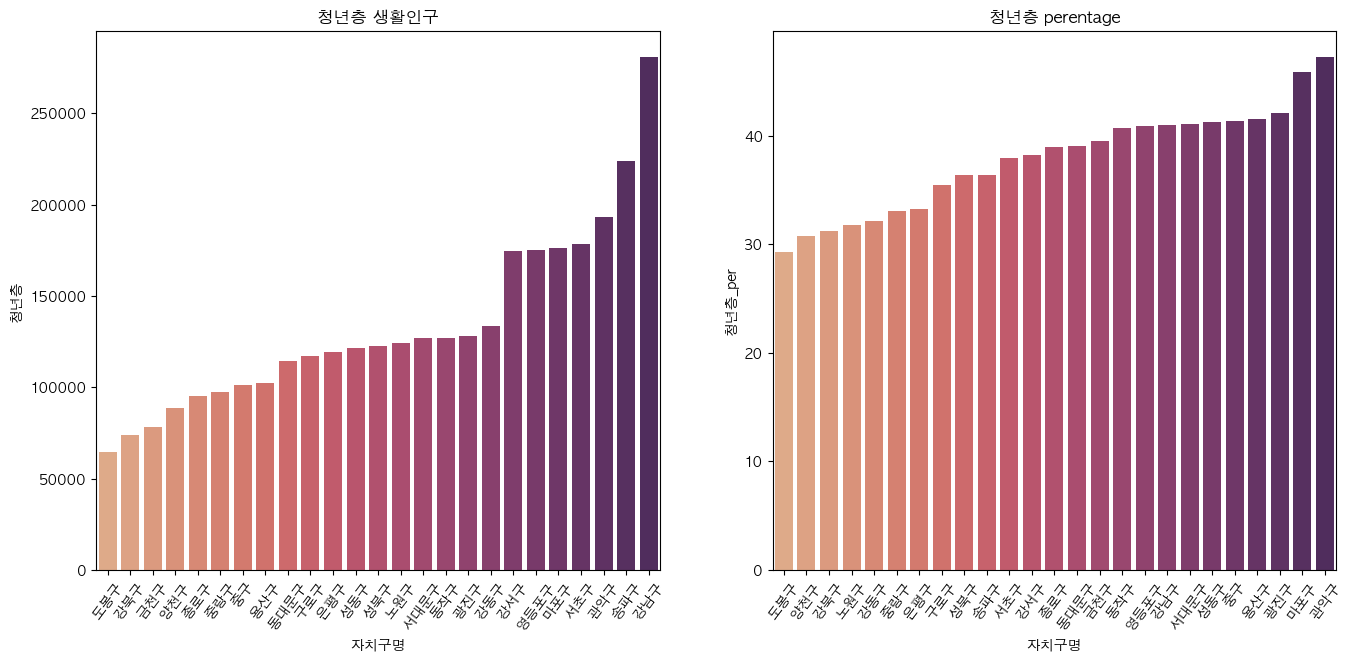

In [22]:
청년층=df[['자치구명','청년층']].sort_values(by='청년층') #청년층 dataframe
중년층=df[['자치구명','중년층']].sort_values(by='중년층') #중년층 dataframe
노년층=df[['자치구명','노년층']].sort_values(by='노년층') #노년층 dataframe

#################################
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)

sns.barplot(data=청년층, x='자치구명', y='청년층', palette='flare')
plt.title('청년층 생활인구', fontweight='bold')
plt.xticks(rotation=53)

청년층_per=age_group[['자치구명','청년층_per']].sort_values(by='청년층_per')
중년층_per=age_group[['자치구명','중년층_per']].sort_values(by='중년층_per')
노년층_per=age_group[['자치구명','노년층_per']].sort_values(by='노년층_per')

plt.subplot(1,2,2)
sns.barplot(data=청년층_per, x='자치구명', y='청년층_per', palette='flare')
plt.title('청년층 perentage', fontweight='bold')
plt.xticks(rotation=53)


plt.show()

## 중년층 생활인구 / 전 연령층 대비 percentage

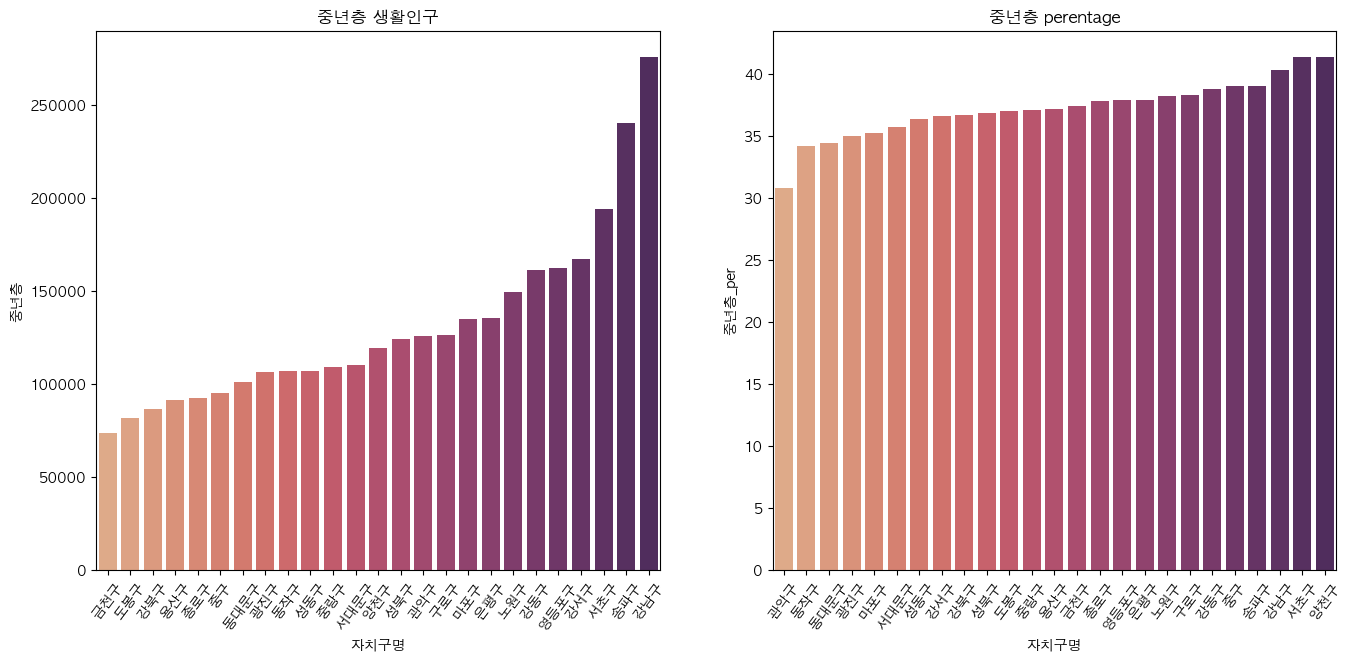

In [23]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
sns.barplot(data=중년층, x='자치구명', y='중년층', palette='flare')
plt.title('중년층 생활인구', fontweight='bold')
plt.xticks(rotation=53)

청년층_per=age_group[['자치구명','청년층_per']].sort_values(by='청년층_per')
중년층_per=age_group[['자치구명','중년층_per']].sort_values(by='중년층_per')
노년층_per=age_group[['자치구명','노년층_per']].sort_values(by='노년층_per')

plt.subplot(1,2,2)
sns.barplot(data=중년층_per, x='자치구명', y='중년층_per', palette='flare')
plt.title('중년층 perentage', fontweight='bold')
plt.xticks(rotation=53)

plt.show()


##  노년층 생활인구 / 전 연령층 대비 percentage

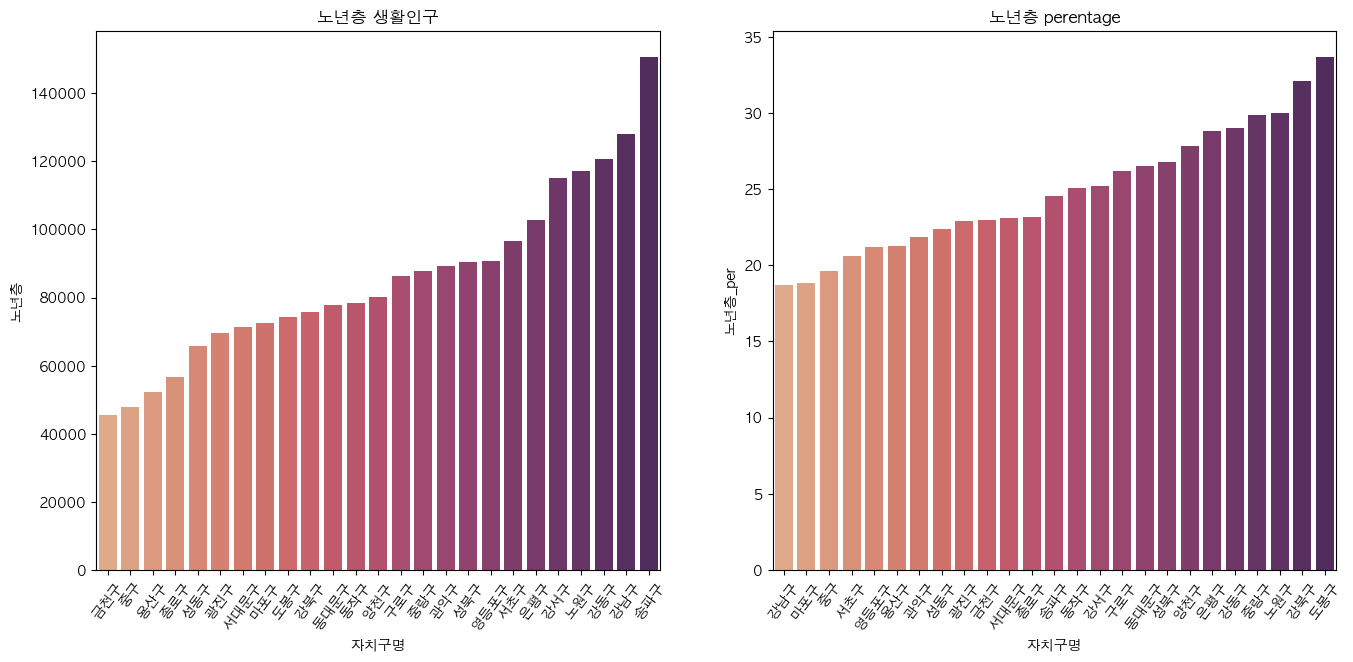

In [24]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
sns.barplot(data=노년층, x='자치구명', y='노년층', palette='flare')
plt.title('노년층 생활인구', fontweight='bold')
plt.xticks(rotation=53)

청년층_per=age_group[['자치구명','청년층_per']].sort_values(by='청년층_per')
중년층_per=age_group[['자치구명','중년층_per']].sort_values(by='중년층_per')
노년층_per=age_group[['자치구명','노년층_per']].sort_values(by='노년층_per')

plt.subplot(1,2,2)
sns.barplot(data=노년층_per, x='자치구명', y='노년층_per', palette='flare')
plt.title('노년층 perentage', fontweight='bold')
plt.xticks(rotation=53)

plt.show()

# 결론

- 자치구의 연령대별 생활인구 밀도를 구할 때 머신러닝 기법인 군집화를 사용하지 않아도 됨
- 파이썬(max, min, value_counts())같은 함수를 사용해 정제하고 시각화를 함으로써 직관적으로 파악 가능한 정도
- 지도학습은 미래의 값을 예측하는 기법(주식가격 예측, 수능성적 예측 등) 
- 비지도학습(=군집화)은 지도학습과 다르게 미래의 값을 수치상으로 예측하지 않으며, 단지 비슷한 특성을 가진 값끼리 군집을 이룸 <br>
**(ex : 비슷한 특성을 가진 학생(인종, 성적, 거주지역, 키, iq, 문과, 이과 등)끼리 반을 형성하는 것과 같은 개념)** -> 값을 수치상으로 도출하지 않고 비슷한 특성을 가진 값끼리 군집화한다.

=> 따라서, 통계적으로 혹은 직관적으로 명확한 수치적 결과를 확인할 수 있는 경우라면 굳이 군집화를 할 이유가 없고, 만약 군집화가 됐다하더라도 유의미한 머신러닝 연구라고 보기 힘들 것임


# 머신러닝 기법을 사용하지 않고 직접 군집 지정하기

## 통계적 분석, EDA를 바탕으로 0, 1, 2로 라벨 설정

In [25]:
per_group=age_group[['자치구명', '청년층_per', '중년층_per', '노년층_per']]

# 'label' 컬럼 생성 
# 청년층의 비율이 높으면 0, 중년층의 비율이 높으면 1, 노년층의 비율이 높으면 2로 저장
per_group['label'] = np.where(
    (per_group['청년층_per'] > per_group['중년층_per']) & (per_group['청년층_per'] > per_group['노년층_per']), 0,
    np.where(
        (per_group['중년층_per'] > per_group['노년층_per']) & (per_group['중년층_per'] > per_group['청년층_per']), 1, 2
    )
)

per_group

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_74544/4079575359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_group['label'] = np.where(


,자치구명,청년층_per,중년층_per,노년층_per,label
0,종로구,39.011449,37.842526,23.146026,0
1,중구,41.374007,39.009693,19.616300,0
2,용산구,41.538647,37.199235,21.262118,0
3,성동구,41.259841,36.377318,22.362841,0
4,광진구,42.133070,34.979298,22.887632,0
5,동대문구,39.063862,34.446442,26.489696,0
6,중랑구,33.040768,37.109544,29.849688,1
7,성북구,36.388881,36.825884,26.785235,1
8,강북구,31.231280,36.712831,32.055889,1
9,도봉구,29.328539,36.984924,33.686537,1


In [26]:
# 전체적으로 노년층 비율이 적으므로 비율 중 30%가 넘으면 상대적으로 노년층의 인구밀도가 높다고 판단
# 따라서 30%가 넘는 구들만 2로 저장
per_group.loc[per_group['노년층_per'] > 30.0, 'label'] = 2
per_group

,자치구명,청년층_per,중년층_per,노년층_per,label
0,종로구,39.011449,37.842526,23.146026,0
1,중구,41.374007,39.009693,19.616300,0
2,용산구,41.538647,37.199235,21.262118,0
3,성동구,41.259841,36.377318,22.362841,0
4,광진구,42.133070,34.979298,22.887632,0
5,동대문구,39.063862,34.446442,26.489696,0
6,중랑구,33.040768,37.109544,29.849688,1
7,성북구,36.388881,36.825884,26.785235,1
8,강북구,31.231280,36.712831,32.055889,2
9,도봉구,29.328539,36.984924,33.686537,2


# 지도 시각화

## json 파일 불러오기 (서울 경계별 경도, 위도 파일)

In [27]:
import json
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
# seoul_geo = json.load(open(jpath, encoding='utf-8'))


In [28]:
import folium
g= folium.Map(location = [37.5642135, 127.0016985],
                  tiles = 'openstreetmap', zoom_start=11.2)
g

In [29]:
m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo,
    name='인당소득',
    data=per_group,
    columns=['자치구명', 'label'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)
m


/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# 결과

- 0(하얀색) => 청년층 생활 인구밀도가 높은 지역
- 1(하늘색) => 중년층 생활 인구밀도가 높은 지역
- 2(파란색) => 노년층 생활 인구밀도가 높은 지역 (상대적 비율)